In [ ]:
import pandas as pd
import io
from google.colab import files
myfile = files.upload() 

Saving important3.csv to important3.csv


In [ ]:
df=pd.read_csv(io.BytesIO(myfile['important3.csv']), encoding='utf-8')

In [ ]:
df

,년도,CH4
0,2008. 01,"1,900.00"
1,2008. 02,"1,909.00"
2,2008. 03,"1,913.00"
3,2008. 04,"1,901.00"
4,2008. 05,"1,893.00"
...,...,...
151,2020. 08,"1,936.00"
152,2020. 09,"2,005.00"
153,2020. 10,"2,028.00"
154,2020. 11,"2,013.00"


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null 
 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10) 
fm._rebuild()
99
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

TypeError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      156 non-null    object
 1   CH4     156 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [ ]:
df['CH4'] = df['CH4'].str.split('.').str[0]

In [ ]:
df = df.replace(',', '', regex=True)

In [ ]:
df['CH4']=pd.to_numeric(df['CH4'])

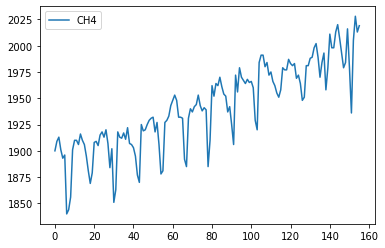

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']

# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

# 모델 생성
from fbprophet import Prophet
model = Prophet()

# 모델 학습
model.fit(df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_year = list()
for i in range(1, 13):
    last_year.append(['2020-%02d' % i])
last_year = pd.DataFrame(last_year, columns = ['ds'])
last_year['ds']= pd.to_datetime(last_year['ds'])

In [ ]:
forecast = model.predict(last_year)

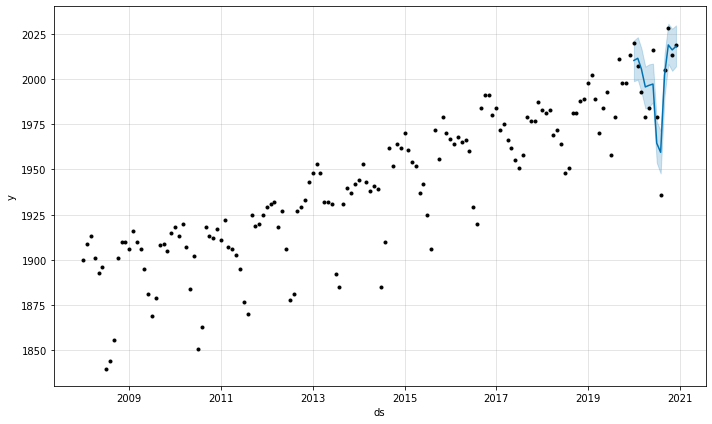

In [ ]:
model.plot(forecast)
pyplot.show()

In [ ]:
last_year = list()

for i in range(21, 23):
  for j in range(1, 13):
    last_year.append(['20%d-%02d' % (i, j)])

last_year = pd.DataFrame(last_year, columns = ['ds'])
last_year['ds']= pd.to_datetime(last_year['ds'])

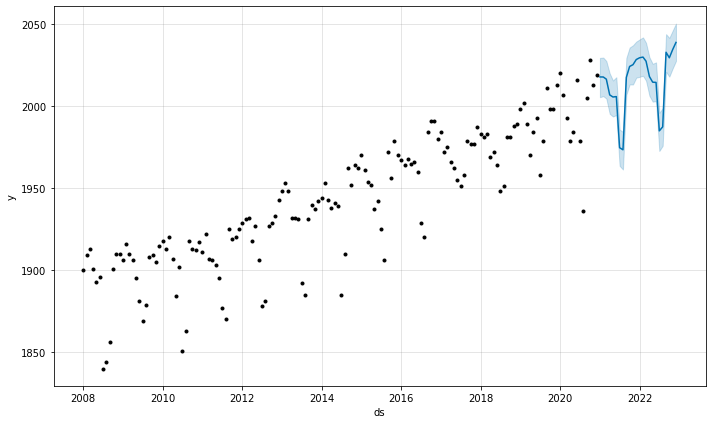

In [ ]:
forecast = model.predict(last_year)
model.plot(forecast)
pyplot.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,2.006559,2.006498,2.029229,2.006559,2.006559,0.011330,0.011330,0.011330,0.011330,0.011330,0.011330,0.0,0.0,0.0,2.017889
1,2021-02-01,2.007471,2.006292,2.029099,2.007458,2.007478,0.010390,0.010390,0.010390,0.010390,0.010390,0.010390,0.0,0.0,0.0,2.017861
2,2021-03-01,2.008294,2.005129,2.026629,2.008252,2.008329,0.008245,0.008245,0.008245,0.008245,0.008245,0.008245,0.0,0.0,0.0,2.016539
3,2021-04-01,2.009206,1.996623,2.018674,2.009117,2.009284,-0.002261,-0.002261,-0.002261,-0.002261,-0.002261,-0.002261,0.0,0.0,0.0,2.006945
4,2021-05-01,2.010088,1.993966,2.016694,2.009939,2.010219,-0.004415,-0.004415,-0.004415,-0.004415,-0.004415,-0.004415,0.0,0.0,0.0,2.005673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2029-08-01,2.098730,2.034998,2.086402,2.076094,2.122007,-0.039297,-0.039297,-0.039297,-0.039297,-0.039297,-0.039297,0.0,0.0,0.0,2.059433
104,2029-09-01,2.099642,2.077575,2.129958,2.076714,2.123136,0.003921,0.003921,0.003921,0.003921,0.003921,0.003921,0.0,0.0,0.0,2.103563
105,2029-10-01,2.100524,2.084047,2.138897,2.077180,2.124311,0.009721,0.009721,0.009721,0.009721,0.009721,0.009721,0.0,0.0,0.0,2.110246
106,2029-11-01,2.101436,2.084495,2.138489,2.077853,2.125516,0.009896,0.009896,0.009896,0.009896,0.009896,0.009896,0.0,0.0,0.0,2.111332
